In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
epa_sea_level = pd.read_csv('epa-sea-level.csv')

epa_sea_level

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


**Scatter Plot**

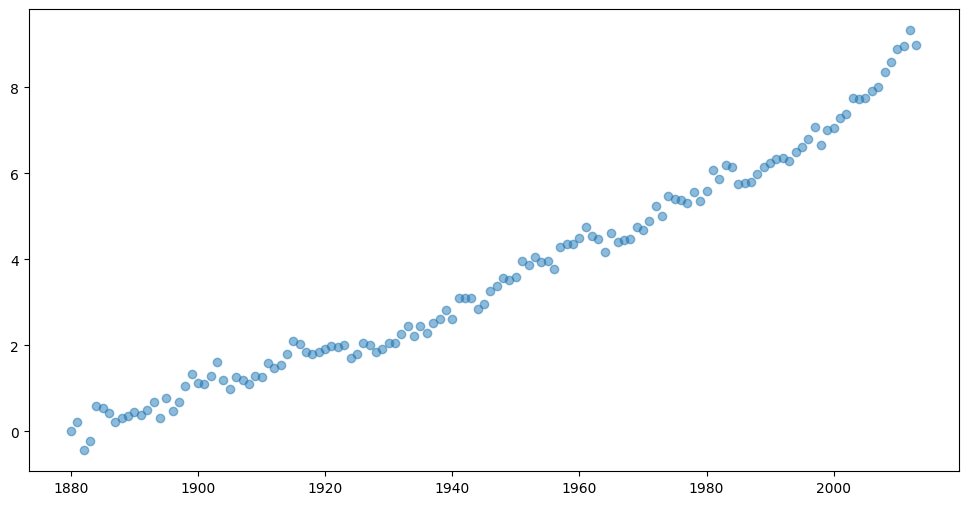

In [3]:
# Creation of a scatter plot with measurements of the sea from CSIRO

fig, ax = plt.subplots(figsize = (12 , 6))

plt.scatter(data = epa_sea_level,
            x = "Year",
            y = "CSIRO Adjusted Sea Level",
            alpha = 0.5
            )


**Line Of Best Fit**

In [4]:
from scipy.stats import linregress

In [5]:
# Determination of the points through which the best-fit line passes
# Inclusion of the year 2050 to predict the sea level at that point

lineA = linregress(epa_sea_level["Year"], epa_sea_level["CSIRO Adjusted Sea Level"])

# Creation of a list from the years column
# The year 2050 is added to the list

xA = epa_sea_level['Year'].tolist()
xA.append(2050)
xA = pd.Series(xA)

yA = lineA.slope * xA + lineA.intercept

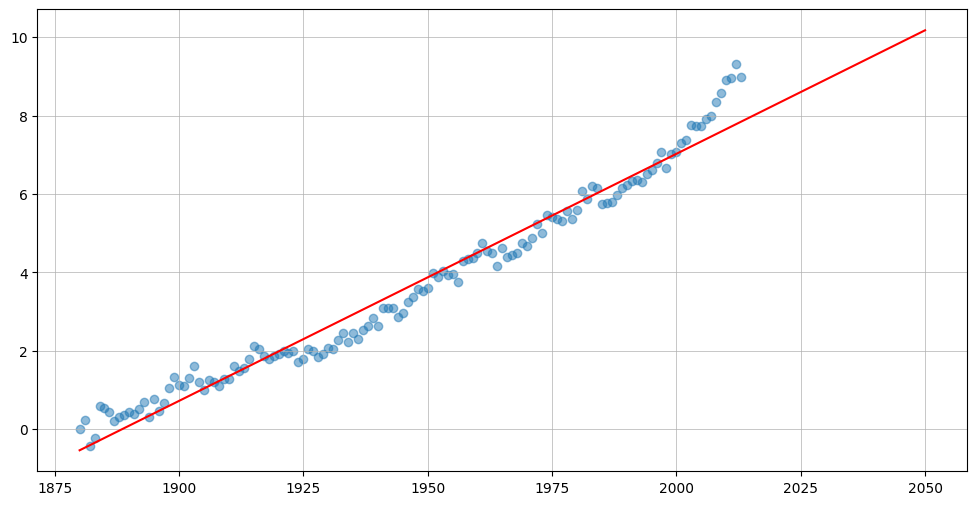

In [6]:
fig, ax = plt.subplots(figsize = (12 , 6))
ax.grid(True, linewidth = 0.5)

plt.scatter(data = epa_sea_level,
            x = "Year",
            y = "CSIRO Adjusted Sea Level",
            alpha = 0.5
            )

plt.plot(xA, yA, "r")



**Data from 2000 onward**

In [7]:
# Creation of a new DataFrame with data only from the year 2000 onwards

modern_data = epa_sea_level.loc[epa_sea_level["Year"] > 1999]

In [8]:
xB = modern_data['Year'].tolist()
xB.append(2050)
xB = pd.Series(xB)

In [9]:
lineB = linregress(modern_data["Year"], modern_data["CSIRO Adjusted Sea Level"])

xB = modern_data['Year'].tolist()
xB.append(2050)
xB = pd.Series(xB)

yB = lineB.slope * xB + lineB.intercept

Text(0, 0.5, 'Sea Level (inches)')

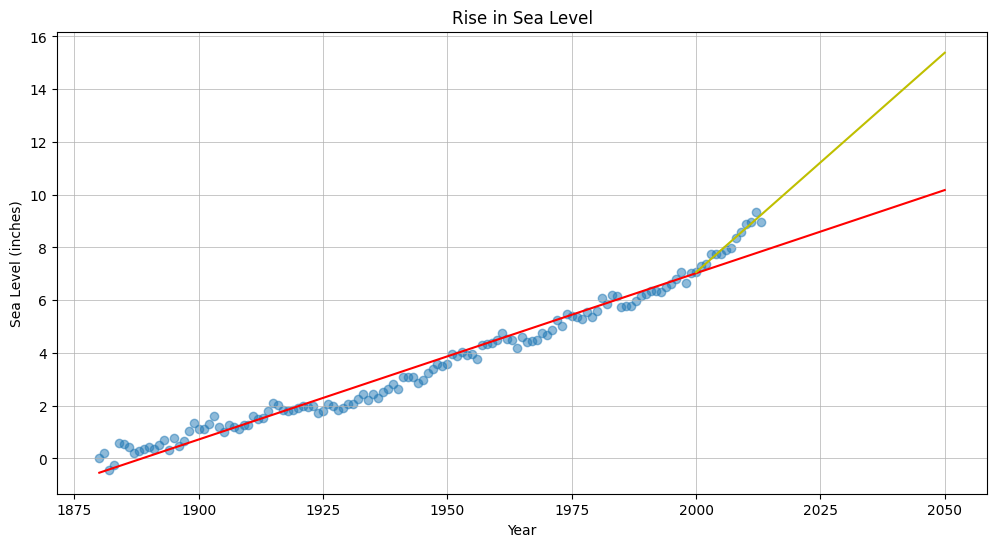

In [11]:
fig, ax = plt.subplots(figsize = (12 , 6))
ax.grid(True, linewidth = 0.5)

plt.scatter(data = epa_sea_level,
            x = "Year",
            y = "CSIRO Adjusted Sea Level",
            alpha = 0.5
            )

plt.plot(xA, yA, "r")

plt.plot(xB, yB, "y")

plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
